In [3]:
# Create reference for CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read CSV file into a dataframe
olympics_path = "resources/athlete_events.csv"

olympics_df = pd.read_csv(olympics_path, low_memory = False)

# Print the first 5 rows
olympics_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# Use only the Summer Olympics for analysis
summer_df = olympics_df[olympics_df['Season'] == 'Summer']

In [6]:
# Create variables for the specific host country
host_country = 'Brazil'
host_NOC = 'BRA'
host_year = 2016

In [7]:
# Create a dataframe for only the Brazil team in the Summer Olympics
host_df = summer_df[summer_df['NOC'] == host_NOC]

In [8]:
# Create a dataframe for the Brazil team in the Summer Olympics grouped by Games. 
games_df_host = host_df.groupby('Games').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
games_df_host['gold_medals'] = host_df[host_df['Medal'] == 'Gold'].groupby('Games').agg({'Medal': ['count']})
games_df_host['silver_medals'] = host_df[host_df['Medal'] == 'Silver'].groupby('Games').agg({'Medal': ['count']})
games_df_host['bronze_medals'] = host_df[host_df['Medal'] == 'Bronze'].groupby('Games').agg({'Medal': ['count']})

# Fill NaN values with 0
games_df_host = games_df_host.fillna(0)

# Format values in all columns except Games to integers
games_df_host = games_df_host.astype(int)

games_df_host

,Medal,gold_medals,silver_medals,bronze_medals
,count,,,
Games,,,,
1900 Summer,0,0,0,0
1920 Summer,7,1,1,5
1924 Summer,0,0,0,0
1932 Summer,0,0,0,0
1936 Summer,0,0,0,0
1948 Summer,10,0,0,10
1952 Summer,3,1,0,2
1956 Summer,1,1,0,0


In [9]:
# Add a column for non-medal participations, which is the count of all rows for Games where Medal is NaN
games_df_host['non_medal_participations'] = host_df[host_df['Medal'].isnull()].groupby('Games').size()

# Add a column for total participations, which is the count of all rows for Games.
# This includes 0 or NaN values for medals
games_df_host['total_participations'] = host_df.groupby('Games').size()
games_df_host

,Medal,gold_medals,silver_medals,bronze_medals,non_medal_participations,total_participations
,count,,,,,
Games,,,,,,
1900 Summer,0,0,0,0,3,3
1920 Summer,7,1,1,5,31,38
1924 Summer,0,0,0,0,18,18
1932 Summer,0,0,0,0,67,67
1936 Summer,0,0,0,0,94,94
1948 Summer,10,0,0,10,95,105
1952 Summer,3,1,0,2,116,119
1956 Summer,1,1,0,0,62,63


In [10]:
# Create new dataframe filtered by columns team, games, year, season, sport, event, medal, city
summer_games_df = summer_df[["Team", "Games", "Year", "Season", "Sport", "Event", "Medal", "City"]]

summer_games_df.head()

,Team,Games,Year,Season,Sport,Event,Medal,City
0,China,1992 Summer,1992,Summer,Basketball,Basketball Men's Basketball,NaN,Barcelona
1,China,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,London
2,Denmark,1920 Summer,1920,Summer,Football,Football Men's Football,NaN,Antwerpen
3,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Paris
26,Netherlands,1932 Summer,1932,Summer,Athletics,Athletics Women's 100 metres,NaN,Los Angeles


In [11]:
# Clean the Data
# Rename column Team to Country
summer_games_df = summer_games_df.rename(columns = {"Team": "Country"})

# Rename column City to Host 
summer_games_df = summer_games_df.rename(columns = {"City": "Host"})

# Filter to the Host Year
summer_games_df = summer_games_df[summer_games_df["Year"] == host_year]

summer_games_df.head()

,Country,Games,Year,Season,Sport,Event,Medal,Host
80,Romania,2016 Summer,2016,Summer,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Rio de Janeiro
139,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Rio de Janeiro
140,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Rio de Janeiro
141,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Rio de Janeiro
142,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Rio de Janeiro


In [12]:
# Drop Unnecessary Columns
summer_games_metals_df = summer_games_df.drop(columns = ["Games", "Sport", "Event"])

summer_games_metals_df

,Country,Year,Season,Medal,Host
80,Romania,2016,Summer,NaN,Rio de Janeiro
139,Spain,2016,Summer,NaN,Rio de Janeiro
140,Spain,2016,Summer,NaN,Rio de Janeiro
141,Spain,2016,Summer,NaN,Rio de Janeiro
142,Spain,2016,Summer,NaN,Rio de Janeiro
...,...,...,...,...,...
271024,Germany,2016,Summer,NaN,Rio de Janeiro
271053,Kazakhstan,2016,Summer,NaN,Rio de Janeiro
271054,Kazakhstan,2016,Summer,NaN,Rio de Janeiro
271055,Kazakhstan,2016,Summer,NaN,Rio de Janeiro


In [13]:
# Create a new dataframe that removes all rows that have an Na in the medal column
host_year_medals_df = summer_games_metals_df.dropna(subset = ["Medal"]) 

host_year_medals_df

,Country,Year,Season,Medal,Host
158,Italy,2016,Summer,Bronze,Rio de Janeiro
161,Azerbaijan,2016,Summer,Bronze,Rio de Janeiro
175,France,2016,Summer,Silver,Rio de Janeiro
450,Iran,2016,Summer,Bronze,Rio de Janeiro
794,Russia,2016,Summer,Silver,Rio de Janeiro
...,...,...,...,...,...
269511,China,2016,Summer,Gold,Rio de Janeiro
270111,Serbia,2016,Summer,Silver,Rio de Janeiro
270281,Uzbekistan,2016,Summer,Gold,Rio de Janeiro
270370,Serbia,2016,Summer,Silver,Rio de Janeiro


In [14]:
# Create new columns for "Gold" medals, "Silver" medals, "Bronze" medals, and "Total Medals"
host_year_medal_countrys_df = host_year_medals_df.groupby('Country').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
host_year_medal_countrys_df['Gold'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Gold'].groupby('Country').agg({'Medal': ['count']})
host_year_medal_countrys_df['Silver'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Silver'].groupby('Country').agg({'Medal': ['count']})
host_year_medal_countrys_df['Bronze'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Bronze'].groupby('Country').agg({'Medal': ['count']})

# Fill NaN values with 0
host_year_medal_countrys_df = host_year_medal_countrys_df.fillna(0)

# Format values in all columns except Games to integers
host_year_medal_countrys_df = host_year_medal_countrys_df.astype(int)

host_year_medal_countrys_df

,Medal,Gold,Silver,Bronze
,count,,,
Country,,,,
Algeria,2,0,2,0
Argentina,22,21,1,0
Armenia,4,1,3,0
Australia,82,23,34,25
Austria,2,0,0,2
...,...,...,...,...
United States-1,4,0,2,2
United States-2,4,2,0,2


In [15]:
# View values in the Country index
host_year_medal_countrys_df.index

Index(['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Belarus', 'Belgium', 'Brazil', 'Brazil-1',
       'Bulgaria', 'Burundi', 'Canada', 'China', 'China-1', 'Chinese Taipei',
       'Colombia', 'Cote d'Ivoire', 'Croatia', 'Cuba', 'Czech Republic',
       'Czech Republic-1', 'Denmark', 'Dominican Republic', 'Egypt', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Germany-1', 'Great Britain', 'Greece', 'Grenada', 'Hungary', 'India',
       'Individual Olympic Athletes', 'Indonesia', 'Indonesia-1', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Italy-1', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', 'Lithuania', 'Malaysia', 'Mexico',
       'Mongolia', 'Morocco', 'Netherlands', 'Netherlands-1', 'New Zealand',
       'Niger', 'Nigeria', 'North Korea', 'Norway', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Russia-2',
       'Ser

In [16]:
## Sort the DataFrame by 'Host' (Brazil first) and then by total medals in descending order
# Sort dataframe by total medal count
host_year_sorted = host_year_medal_countrys_df.iloc[host_year_medal_countrys_df.iloc[:-1].sum(axis=1).argsort()[::-1]]

# Move the Brazil row to the top
host_row = host_year_sorted.loc[host_country]
df_sorted = host_year_sorted.drop(host_country)
host_year_sorted = pd.concat([host_row.to_frame().transpose(), host_year_sorted])

host_year_sorted.head(15)

,Medal,Gold,Silver,Bronze
,count,,,
Brazil,46,34,6,6
United States,256,137,52,67
Germany,157,47,43,67
Great Britain,145,64,55,26
Russia,113,50,28,35
China,109,44,30,35
France,96,20,55,21
Australia,82,23,34,25
Italy,70,8,38,24


In [17]:
# Rename Medal, count column to Total Medals
host_year_sorted = host_year_sorted.rename(columns = {"Medal" : "Total Medals"})
host_year_sorted = host_year_sorted.rename(columns = {"count" : " "})

host_year_sorted.head(15)

,Total Medals,Gold,Silver,Bronze
,,,,
Brazil,46,34,6,6
United States,256,137,52,67
Germany,157,47,43,67
Great Britain,145,64,55,26
Russia,113,50,28,35
China,109,44,30,35
France,96,20,55,21
Australia,82,23,34,25
Italy,70,8,38,24


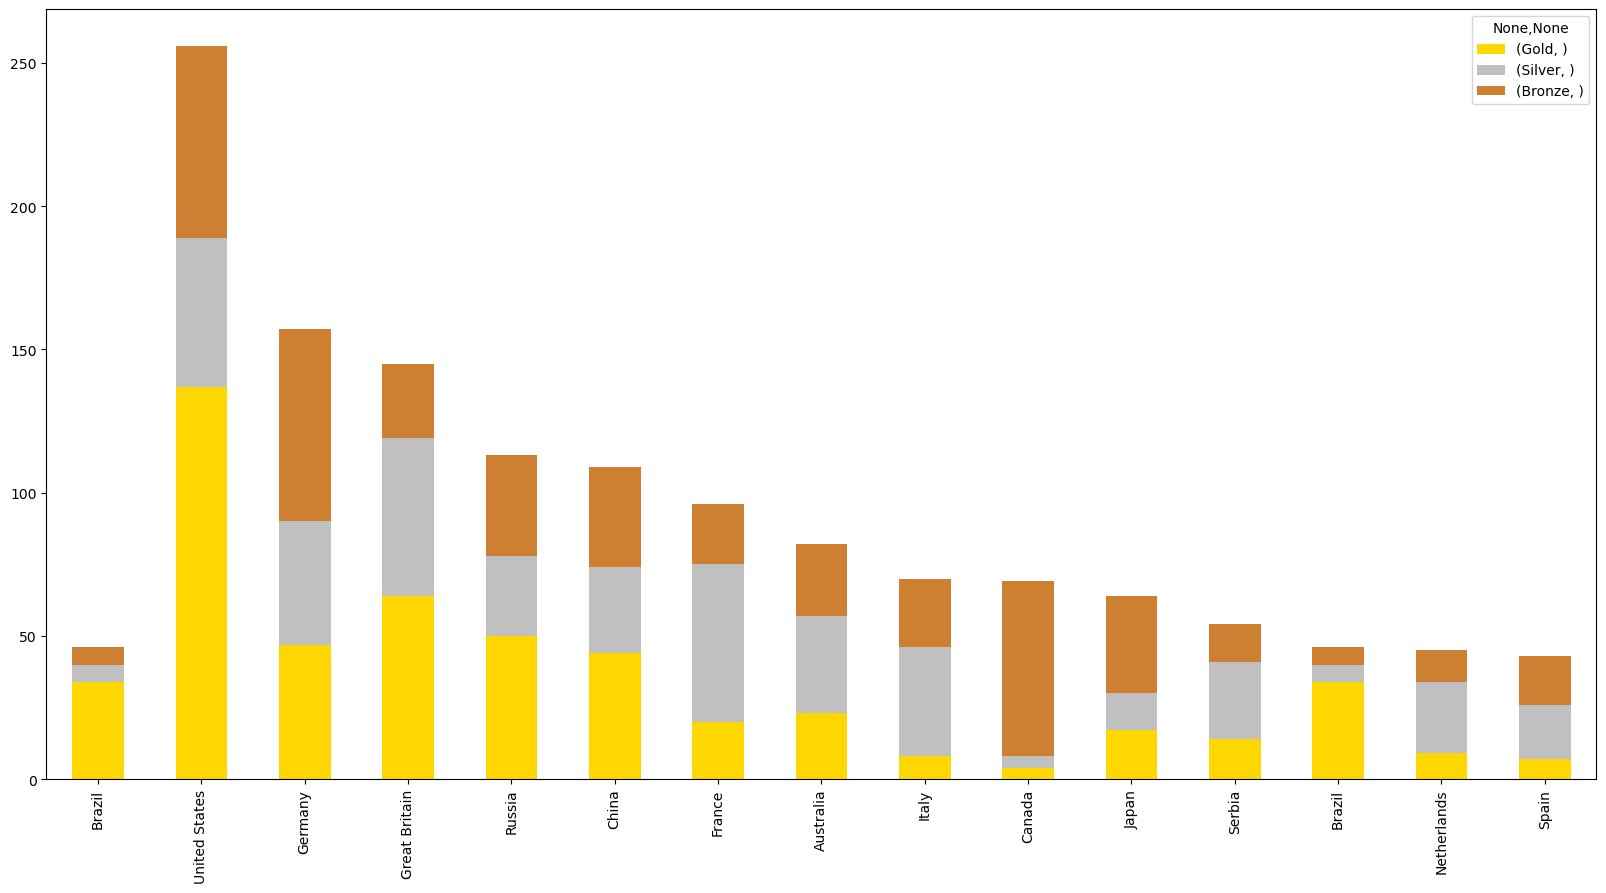

In [18]:
# Use a bar chart to plot the medal count for the Brazil team in the Summer Olympics.
host_year_sorted.head(15)[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, color=['#ffd700', '#c0c0c0', '#cd7f32'], figsize=(20, 10))

# Save Image for Use in Slides
plt.savefig('resources/medals_won_brazil.png')

** Normalizing the Team Sport Medal Counts **

In [19]:
# View all the values in the Sport column
summer_games_df['Event'].unique()

array(["Weightlifting Women's Super-Heavyweight",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Floor Exercise",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's 5,000 metres",
       "Rowing Men's Coxless Pairs", "Taekwondo Women's Flyweight",
       "Handball Men's Handball", "Boxing Men's Middleweight",
       "Athletics Men's 400 metres", "Handball Women's Handball",
       "Weightlifting Men's Heavyweight",
       'Equestrianism Mixed Three-Day Event, Individual',
       'Equestrianism Mixed Three-Day Event, Team',
       "Cycling Women's Road Race, Individual",
       "Volleyball Men's Volleyball", "Diving Women's Platform",
       "Shooting Men's Air Pistol, 10 metres",
       "Shooting Men's Free Pistol, 50 metres",
       "Shooting Women's Air Rifle, 10 metres",
       "Boxing Men's Lightweight", "Judo Men's Half-Middleweight",
   

In [20]:
# Combine values in the Event column into a single row by Country (Exmample all 'Football Men's Football' should be on the same row for each country)
combined_events_df = summer_games_df.dropna(subset = ["Medal"]) 

combined_events_df


,Country,Games,Year,Season,Sport,Event,Medal,Host
158,Italy,2016 Summer,2016,Summer,Rowing,Rowing Men's Coxless Pairs,Bronze,Rio de Janeiro
161,Azerbaijan,2016 Summer,2016,Summer,Taekwondo,Taekwondo Women's Flyweight,Bronze,Rio de Janeiro
175,France,2016 Summer,2016,Summer,Handball,Handball Men's Handball,Silver,Rio de Janeiro
450,Iran,2016 Summer,2016,Summer,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze,Rio de Janeiro
794,Russia,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Team All-Around,Silver,Rio de Janeiro
...,...,...,...,...,...,...,...,...
269511,China,2016 Summer,2016,Summer,Volleyball,Volleyball Women's Volleyball,Gold,Rio de Janeiro
270111,Serbia,2016 Summer,2016,Summer,Volleyball,Volleyball Women's Volleyball,Silver,Rio de Janeiro
270281,Uzbekistan,2016 Summer,2016,Summer,Boxing,Boxing Men's Flyweight,Gold,Rio de Janeiro
270370,Serbia,2016 Summer,2016,Summer,Canoeing,"Canoeing Men's Kayak Doubles, 1,000 metres",Silver,Rio de Janeiro


In [21]:
combined_events_df = combined_events_df.groupby(['Country', 'Year', 'Season', 'Sport', 'Medal', 'Host'])['Event'].apply(', '.join).reset_index()

combined_events_df.tail(25)

,Country,Year,Season,Sport,Medal,Host,Event
597,United States,2016,Summer,Swimming,Bronze,Rio de Janeiro,"Swimming Men's 50 metres Freestyle, Swimming M..."
598,United States,2016,Summer,Swimming,Gold,Rio de Janeiro,"Swimming Men's 4 x 100 metres Freestyle Relay,..."
599,United States,2016,Summer,Swimming,Silver,Rio de Janeiro,"Swimming Women's 100 metres Backstroke, Swimmi..."
600,United States,2016,Summer,Taekwondo,Bronze,Rio de Janeiro,Taekwondo Women's Heavyweight
601,United States,2016,Summer,Triathlon,Gold,Rio de Janeiro,Triathlon Women's Olympic Distance
602,United States,2016,Summer,Volleyball,Bronze,Rio de Janeiro,"Volleyball Women's Volleyball, Volleyball Wome..."
603,United States,2016,Summer,Water Polo,Gold,Rio de Janeiro,"Water Polo Women's Water Polo, Water Polo Wome..."
604,United States,2016,Summer,Weightlifting,Bronze,Rio de Janeiro,Weightlifting Women's Super-Heavyweight
605,United States,2016,Summer,Wrestling,Bronze,Rio de Janeiro,"Wrestling Men's Light-Heavyweight, Freestyle"
606,United States,2016,Summer,Wrestling,Gold,Rio de Janeiro,"Wrestling Women's Featherweight, Freestyle, Wr..."
